In [184]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

gtd = pd.read_csv('Resource/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
gtd.head()

C:\Users\Layla Jeon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


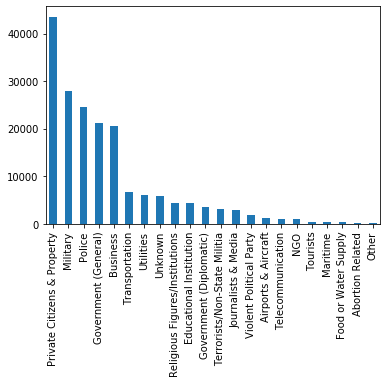

In [185]:
#Who is the most common target(institution) to these attacks?
Targettype = gtd["targtype1_txt"]
Targetcount = Targettype.value_counts()
Targetcount.plot.bar()

In [208]:
#Which group is behind the majority of these attacks?
# - Trend over the years? - make line chart

Groupbehind = pd.DataFrame(gtd, columns = ["eventid", "iyear", "gname"])
Groupbehind = Groupbehind.groupby(["gname","iyear"]).count()
Groupbehind = Groupbehind.reset_index()
Groupbehind = Groupbehind.rename(columns={"iyear": "Year", "eventid": "Attack Count", "gname": "Perpetrator Group Name"})
Groupbehind = Groupbehind.sort_values("Attack Count", ascending=False)


groupyear = pd.Series(Groupbehind["Year"])
groupattack = pd.Series(Groupbehind["Attack Count"])


Groupbehind

,Perpetrator Group Name,Year,Attack Count
8790,Unknown,2014,8813
8789,Unknown,2013,7973
8791,Unknown,2015,6397
8792,Unknown,2016,5969
8788,Unknown,2012,4826
8793,Unknown,2017,4349
8787,Unknown,2011,3175
8784,Unknown,2008,2990
8785,Unknown,2009,2916
8786,Unknown,2010,2906


In [179]:
# Success rate by target?

Target_attack_count = pd.DataFrame(gtd, columns = ["eventid","targtype1_txt"])
Target_attack_count = Target_attack_count.groupby(["targtype1_txt"]).count()

Target_attack_success = pd.DataFrame(gtd, columns = ["success","targtype1_txt"])
Target_attack_success = Target_attack_success.loc[lambda Target_attack_success: Target_attack_success['success'] == 1]
Target_attack_success = Target_attack_success.groupby(["targtype1_txt"]).count()

SuccessRate = pd.merge(Target_attack_count, Target_attack_success, on=('targtype1_txt'), how='left')
SuccessRate['Success Rate'] = SuccessRate['success']/SuccessRate['eventid']
SuccessRate = SuccessRate.reset_index()
SuccessRate = SuccessRate.rename(columns={"targtype1_txt": "Target Type", "eventid": "Attack Count", "success": "Success Count"})

SuccessRate = SuccessRate.sort_values("Success Rate", ascending=False)

SuccessRate.head()


,Target Type,Attack Count,Success Count,Success Rate
20,Utilities,6023,5703,0.946870
10,NGO,970,912,0.940206
15,Telecommunication,1009,948,0.939544
13,Private Citizens & Property,43511,40658,0.934430
2,Business,20669,19245,0.931105


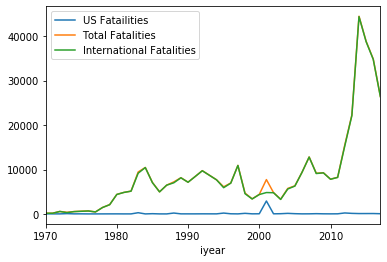

In [180]:
#US fatalities vs international fatalities - line plot for this
Fatalities = pd.DataFrame(gtd, columns = ["iyear", "nkillus", "nkill"])

Fatalities_Sum = Fatalities.groupby(["iyear"]).sum()
Fatalities_Sum["International Fatalities"] = Fatalities_Sum['nkill'] - Fatalities_Sum['nkillus']
Fatalities_Sum = Fatalities_Sum.rename(columns={"iyear": "Year", "nkillus": "US Fatailities", "nkill": "Total Fatalities"})
Fatalities_Sum.plot.line()

#US FATAL 2001year - 2915.0 (9.11)